<a href="https://colab.research.google.com/github/Harsha0018/water-quality-prediction-using-deep-learning/blob/main/water%20quality%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sklearn-features

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy

## Other
import os, joblib, missingno

## sklearn -- Preprocessing & Tuning & Transformation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures,OrdinalEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector
from sklearn.metrics import mean_squared_error


In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import GRU, LSTM, SimpleRNN, Conv2D



In [ ]:
!pip install torch torchvision


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import io
df = pd.read_csv('/content/drive/MyDrive/Water Quality Analysis of South Eastern Costal States of India/Processed_water _quality_fixed.csv')
df.head()

,Year,Monitoring Location,Type of Water Body,State,Min Temp (20<),Max Temp (>30),Avg Temp,Min Dissolved O2(mg/L),Max Dissolved O2(mg/L),AvgDissolved O2(mg/L),...,Min BOD (mg/L)(<5),Max BOD (mg/L)(>5),Avg BOD,Min NitrateN + NitriteN (mg/L)(<0.3),Max NitrateN + NitriteN (mg/L)(>0.5),Avg NitrateN + NitriteN (mg/L),Min Fecal Coliform (MPN/100ML),Max Fecal Coliform (MPN/100ML) (<200),Avg Fecal Coliform (MPN/100ML),Water Quality
0,2022,"SEA WATER, BAY OF BENGAL, AFTER CONFLUENCE OF ...",MARINE,ANDHRA PRADESH,21.0,30.0,25.5,5.2,7.2,6.20,...,1.2,2.5,1.85,0.32,1.38,0.850,3.0,7.0,5.0,0
1,2022,CONFLUENCE OF MARINE OUTFALL OF M/S MATRIX LAB...,MARINE,ANDHRA PRADESH,25.0,28.0,26.5,5.2,6.6,5.90,...,1.4,2.8,2.10,0.32,0.88,0.600,3.0,11.0,7.0,1
2,2022,"RUSHIKONDA BEACH,VISAKHAPATNAM",BEACH,ANDHRA PRADESH,25.0,29.0,27.0,4.8,7.0,5.90,...,1.2,2.9,2.05,0.32,1.13,0.725,3.0,14.0,8.5,1
3,2022,"SEA WATER BAY BENGAL, UPPADA BEACH ROAD, KAKINADA",BEACH,ANDHRA PRADESH,25.0,28.0,26.5,4.5,7.9,6.20,...,2.2,2.8,2.50,0.42,1.32,0.870,3.0,20.0,11.5,0
4,2022,"WATER PORT, KAKINADA (1KM AWAY FROM JETTY)",SEA,ANDHRA PRADESH,25.0,27.0,26.0,5.3,8.0,6.65,...,2.2,3.9,3.05,0.82,3.32,2.070,4.0,23.0,13.5,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Year                                   216 non-null    int64  
 1   Monitoring Location                    216 non-null    object 
 2   Type of Water Body                     216 non-null    object 
 3   State                                  216 non-null    object 
 4   Min Temp (20<)                         216 non-null    float64
 5   Max Temp (>30)                         216 non-null    float64
 6   Avg Temp                               216 non-null    float64
 7   Min Dissolved O2(mg/L)                 216 non-null    float64
 8   Max Dissolved O2(mg/L)                 216 non-null    float64
 9   AvgDissolved O2(mg/L)                  216 non-null    float64
 10  Min pH(7.5<)                           216 non-null    float64
 11  Max pH

In [ ]:
df.shape


(216, 26)

In [ ]:
df.isna


<bound method DataFrame.isna of      Year                                Monitoring Location  \
0    2022  SEA WATER, BAY OF BENGAL, AFTER CONFLUENCE OF ...   
1    2022  CONFLUENCE OF MARINE OUTFALL OF M/S MATRIX LAB...   
2    2022                     RUSHIKONDA BEACH,VISAKHAPATNAM   
3    2022  SEA WATER BAY BENGAL, UPPADA BEACH ROAD, KAKINADA   
4    2022         WATER PORT, KAKINADA (1KM AWAY FROM JETTY)   
..    ...                                                ...   
211  2019  SEA WATER, BAY OF\n BENGAL, VADAREVU BEACH, CH...   
212  2019     SEA WATER, BAY OF\n BENGAL, KRISHNAPATNAM PORT   
213  2019  SEA WATER BAY BENGAL, UPPADA BEACH ROAD,\n KAK...   
214  2019  SEA WATER, BAY OF BENGAL NEAR DEEP WATER PORT,...   
215  2019  SEA WATER BAY OF BENGAL NEAR KUMBHABHISHEKAM\n...   

    Type of Water Body           State  Min Temp (20<)  Max Temp (>30)  \
0               MARINE  ANDHRA PRADESH            21.0            30.0   
1               MARINE  ANDHRA PRADESH            25.0            28.0   
2                BEACH  ANDHRA PRADESH            25.0            29.0   
3                BEACH  ANDHRA PRADESH            25.0            28.0   
4                  SEA  ANDHRA PRADESH            25.0            27.0   
..                 ...             ...             ...             ...   
211             MARINE  ANDHRA PRADESH            23.0            30.0   
212             MARINE  ANDHRA PRADESH            18.0            23.0   
213                SEA  ANDHRA PRADESH            27.0            34.0   
214                SEA  ANDHRA PRADESH            26.0            34.0   
215                SEA  ANDHRA PRADESH            27.0            33.0   

     Avg Temp  Min Dissolved O2(mg/L)  Max Dissolved O2(mg/L)  \
0        25.5                     5.2                     7.2   
1        26.5                     5.2                     6.6   
2        27.0                     4.8                     7.0   
3        26.5                     4.5                     7.9   
4        26.0                     5.3                     8.0   
..        ...                     ...                     ...   
211      26.5                     4.3                     5.7   
212      20.5                     3.8                     6.0   
213      30.5                     5.4                     6.6   
214      30.0                     0.7                     5.8   
215      30.0                     1.0                     7.5   

     AvgDissolved O2(mg/L)  ...  Min BOD (mg/L)(<5)  Max BOD (mg/L)(>5)  \
0                     6.20  ...                 1.2                 2.5   
1                     5.90  ...                 1.4                 2.8   
2                     5.90  ...                 1.2                 2.9   
3                     6.20  ...                 2.2                 2.8   
4                     6.65  ...                 2.2                 3.9   
..                     ...  ...                 ...                 ...   
211                   5.00  ...                 2.2                 3.8   
212                   4.90  ...                 2.0                 3.6   
213                   6.00  ...                 1.6                 2.8   
214                   3.25  ...                 1.0                 3.6   
215                   4.25  ...                 1.1                 4.6   

     Avg BOD  Min NitrateN + NitriteN (mg/L)(<0.3)  \
0       1.85                                  0.32   
1       2.10                                  0.32   
2       2.05                                  0.32   
3       2.50                                  0.42   
4       3.05                                  0.82   
..       ...                                   ...   
211     3.00                                  0.36   
212     2.80                                  0.42   
213     2.20                                  0.63   
214     2.30                                  0.76   
215     2.85                      

In [ ]:
df.drop(['Year', 'Monitoring Location', 'Type of Water Body', 'State'], axis=1, inplace=True)


In [ ]:
correlation_matrix = df.corr()
water_quality_correlation = correlation_matrix['Water Quality'].sort_values(ascending=False)
print(water_quality_correlation)


Water Quality                            1.000000
Min NitrateN + NitriteN (mg/L)(<0.3)     0.376754
Avg NitrateN + NitriteN (mg/L)           0.135206
Max Conductivity (μmho/cm)(>50k)         0.120787
Max NitrateN + NitriteN (mg/L)(>0.5)     0.091947
Min BOD (mg/L)(<5)                      -0.068684
Min Fecal Coliform (MPN/100ML)          -0.072464
Avg Conductivity (μmho/cm)              -0.111129
Min pH(7.5<)                            -0.113683
Max pH(>8.4)                            -0.121709
Avg pH                                  -0.137815
Max Fecal Coliform (MPN/100ML) (<200)   -0.152262
Avg BOD                                 -0.152336
Avg Fecal Coliform (MPN/100ML)          -0.154806
Max BOD (mg/L)(>5)                      -0.165341
Min Conductivity (μmho/cm)(<30k)        -0.169301
Max Temp (>30)                          -0.192678
Min Dissolved O2(mg/L)                  -0.356602
Avg Temp                                -0.362562
Min Temp (20<)                          -0.385768


In [ ]:
X = df.drop(columns=['Water Quality'], axis=1)   ## Features
y = df['Water Quality']   ## target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=42)

## Check Shapes of these Sets
print('X_train shape -- ', X_train.shape)
print('y_train shape -- ', y_train.shape)
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape)

X_train shape --  (183, 21)
y_train shape --  (183,)
X_test shape --  (33, 21)
y_test shape --  (33,)


In [ ]:
num_pipeline = Pipeline(steps=[
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler())
                              ]
                       )
## deal with (num_pipline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train_num = num_pipeline.fit_transform(X_train)  ## train
X_test_num = num_pipeline.transform(X_test)

In [ ]:




# Load your dataset
data = pd.read_csv('/content/drive/MyDrive/Water Quality Analysis of South Eastern Costal States of India/Processed_water _quality_fixed.csv')

# Determine the input size (number of features)
input_size = data.shape[1] - 1  # Subtract 1 for the target variable
print("Input size:", input_size)


Input size: 25


In [ ]:

import tensorflow as tf
from tensorflow.keras.layers import GRU, LSTM, SimpleRNN, Conv1D, Dense, Flatten
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split


GRU

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix

# Set the random seed for NumPy
np.random.seed(42)

# Set the random seed for PyTorch
torch.manual_seed(42)

# Define your data
X_train_num = np.random.rand(100, 9, 1)
y_train = np.random.randint(0, 2, size=(100, 1))


# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_num, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

# Define the GRU model
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.gru(x)
        out = self.fc(out[:, -1, :])
        return out

# Create the GRU model
input_size = 1
hidden_size = 128
output_size = 1
model = GRUModel(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()  # Binary cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Function to calculate accuracy
def calculate_accuracy(outputs, labels):
    preds = (outputs >= 0.5).to(torch.float32)
    correct = (preds == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy

# Train the model
num_epochs = 50
for epoch in range(num_epochs):
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    accuracy = calculate_accuracy(torch.sigmoid(outputs), y_train_tensor)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}, Accuracy: {accuracy * 100:.2f}%')

# Calculate and print the confusion matrix
y_pred = (torch.sigmoid(outputs) >= 0.5).squeeze().numpy()
y_true = y_train.squeeze()
confusion = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(confusion)




Epoch [1/50], Loss: 0.6930860280990601, Accuracy: 52.00%
Epoch [2/50], Loss: 0.6925920248031616, Accuracy: 52.00%
Epoch [3/50], Loss: 0.69233238697052, Accuracy: 52.00%
Epoch [4/50], Loss: 0.6922116279602051, Accuracy: 52.00%
Epoch [5/50], Loss: 0.6920978426933289, Accuracy: 52.00%
Epoch [6/50], Loss: 0.6919289231300354, Accuracy: 52.00%
Epoch [7/50], Loss: 0.6917240619659424, Accuracy: 52.00%
Epoch [8/50], Loss: 0.6915218234062195, Accuracy: 52.00%
Epoch [9/50], Loss: 0.6913461089134216, Accuracy: 52.00%
Epoch [10/50], Loss: 0.6911973357200623, Accuracy: 52.00%
Epoch [11/50], Loss: 0.6910579204559326, Accuracy: 52.00%
Epoch [12/50], Loss: 0.6909084320068359, Accuracy: 52.00%
Epoch [13/50], Loss: 0.6907402276992798, Accuracy: 52.00%
Epoch [14/50], Loss: 0.6905574798583984, Accuracy: 53.00%
Epoch [15/50], Loss: 0.6903718709945679, Accuracy: 53.00%
Epoch [16/50], Loss: 0.6901947259902954, Accuracy: 52.00%
Epoch [17/50], Loss: 0.6900302171707153, Accuracy: 52.00%
Epoch [18/50], Loss: 0.68

GRU Confusion Matrix

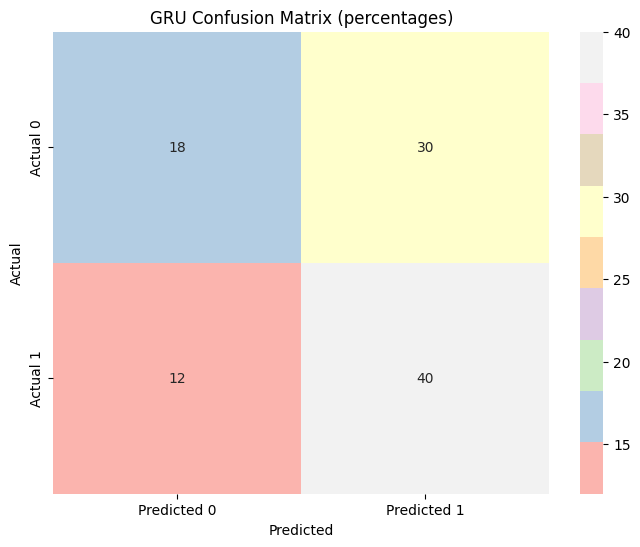

In [ ]:
# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Pastel1", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('GRU Confusion Matrix (percentages)')
plt.show()

In [ ]:
# Define the values from the confusion matrix
TP = 43
FP = 10
FN = 9
TN = 38

#Calcuate accuracy
accuracy = ((TP + TN) / (TP + TN + FP + FN))*100

# Calculate recall
recall = (TP / (TP + FN))*100

# Calculate precision
precision = (TP / (TP + FP))*100


# Calculate F1 Score
f1_score = (2 * (precision * recall) / (precision + recall))


# Sensitivity is the same as recall
sensitivity = recall

print(f"Recall : {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1_score:.4f}")

Recall : 82.6923
Precision: 81.1321
Accuracy: 81.0000
F1 Score: 81.9048


LSTM

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Set the random seed for NumPy
np.random.seed(42)

# Set the random seed for PyTorch
torch.manual_seed(42)

# Define your data
X_train_num = np.random.rand(100, 9, 1)
y_train = np.random.randint(0, 2, size=(100, 1))

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_num, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

# Create the LSTM model
input_size = 1
hidden_size = 128
output_size = 1
model = LSTMModel(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()  # Binary cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    accuracy = calculate_accuracy(torch.sigmoid(outputs), y_train_tensor)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}, Accuracy: {accuracy * 100:.2f}%')

# Calculate and print the confusion matrix
y_pred = (torch.sigmoid(outputs) >= 0.5).squeeze().numpy()
y_true = y_train.squeeze()
confusion = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(confusion)


Epoch [1/100], Loss: 0.6939208507537842, Accuracy: 48.00%
Epoch [2/100], Loss: 0.6932780742645264, Accuracy: 48.00%
Epoch [3/100], Loss: 0.692790687084198, Accuracy: 52.00%
Epoch [4/100], Loss: 0.6924476027488708, Accuracy: 52.00%
Epoch [5/100], Loss: 0.6922386884689331, Accuracy: 52.00%
Epoch [6/100], Loss: 0.692148745059967, Accuracy: 52.00%
Epoch [7/100], Loss: 0.6921416521072388, Accuracy: 52.00%
Epoch [8/100], Loss: 0.6921542286872864, Accuracy: 52.00%
Epoch [9/100], Loss: 0.6921286582946777, Accuracy: 52.00%
Epoch [10/100], Loss: 0.692048192024231, Accuracy: 52.00%
Epoch [11/100], Loss: 0.6919286251068115, Accuracy: 52.00%
Epoch [12/100], Loss: 0.6917953491210938, Accuracy: 52.00%
Epoch [13/100], Loss: 0.6916688680648804, Accuracy: 52.00%
Epoch [14/100], Loss: 0.6915612816810608, Accuracy: 52.00%
Epoch [15/100], Loss: 0.6914752125740051, Accuracy: 52.00%
Epoch [16/100], Loss: 0.6914068460464478, Accuracy: 52.00%
Epoch [17/100], Loss: 0.691347599029541, Accuracy: 52.00%
Epoch [18/

LSTM Confusion Matrix

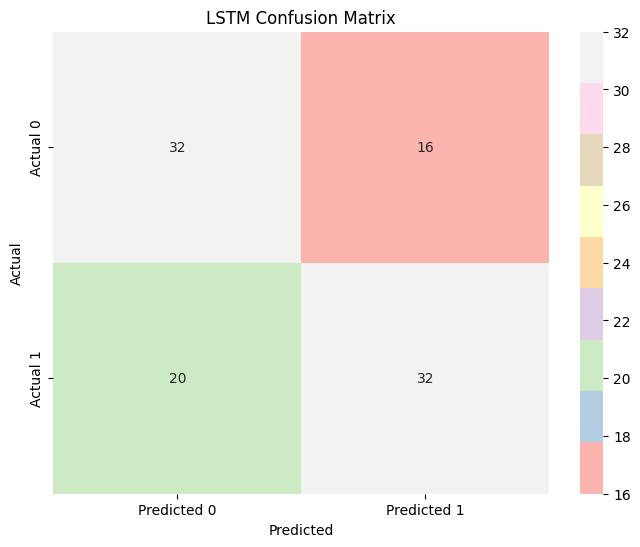

In [ ]:
# Visualize the confusion matrix as a heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Pastel1", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LSTM Confusion Matrix')
plt.show()

In [ ]:
# Define the values from the confusion matrix
TP = 38
FP = 15
FN = 14
TN = 33

#Calculate accuracy
accuracy = ((TP + TN) / (TP + TN + FP + FN))*100

# Calculate recall
recall = (TP / (TP + FN))*100

# Calculate precision
precision = (TP / (TP + FP))*100

#Calculate F1 Score
f1_score = (2 * (precision * recall) / (precision + recall))

# Sensitivity is the same as recall
sensitivity = recall

print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Accuarcy: {accuracy:.4f}")
print(f"F1 Score: {f1_score:.4f}")

Recall (Sensitivity): 73.0769
Precision: 71.6981
Accuarcy: 71.0000
F1 Score: 72.3810


Hybrid GRU+LSTM

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score, mean_absolute_percentage_error

# Set the random seed for NumPy and PyTorch
np.random.seed(42)
torch.manual_seed(42)

# Define your data
X_train_num = np.random.rand(100, 9, 1)
y_train = np.random.randint(0, 2, size=(100, 1))

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_num, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

# Define the hybrid model with LSTM and GRU layers
class HybridModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(HybridModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.gru = nn.GRU(hidden_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out_lstm, _ = self.lstm(x)
        out_gru, _ = self.gru(out_lstm)
        out = self.fc(out_gru[:, -1, :])
        return out

# Create the hybrid model
input_size = 1
hidden_size = 64
output_size = 1
model = HybridModel(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()  # Binary cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the hybrid model
num_epochs = 320
for epoch in range(num_epochs):
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    accuracy = calculate_accuracy(torch.sigmoid(outputs), y_train_tensor)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}, Accuracy: {accuracy * 100:.2f}%')


# Calculate and print the confusion matrix
y_pred = (torch.sigmoid(outputs) >= 0.5).squeeze().numpy()
y_true = y_train.squeeze()
confusion = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(confusion)


Epoch [1/320], Loss: 0.6924992203712463, Accuracy: 52.00%
Epoch [2/320], Loss: 0.6924186944961548, Accuracy: 52.00%
Epoch [3/320], Loss: 0.6923487186431885, Accuracy: 52.00%
Epoch [4/320], Loss: 0.6922537088394165, Accuracy: 52.00%
Epoch [5/320], Loss: 0.6921778917312622, Accuracy: 52.00%
Epoch [6/320], Loss: 0.6921107769012451, Accuracy: 52.00%
Epoch [7/320], Loss: 0.6920304298400879, Accuracy: 52.00%
Epoch [8/320], Loss: 0.6919405460357666, Accuracy: 52.00%
Epoch [9/320], Loss: 0.6918536424636841, Accuracy: 52.00%
Epoch [10/320], Loss: 0.6917708516120911, Accuracy: 52.00%
Epoch [11/320], Loss: 0.6916812658309937, Accuracy: 52.00%
Epoch [12/320], Loss: 0.6915799975395203, Accuracy: 52.00%
Epoch [13/320], Loss: 0.6914737224578857, Accuracy: 52.00%
Epoch [14/320], Loss: 0.6913669109344482, Accuracy: 52.00%
Epoch [15/320], Loss: 0.6912524700164795, Accuracy: 52.00%
Epoch [16/320], Loss: 0.69112229347229, Accuracy: 52.00%
Epoch [17/320], Loss: 0.6909805536270142, Accuracy: 52.00%
Epoch [1

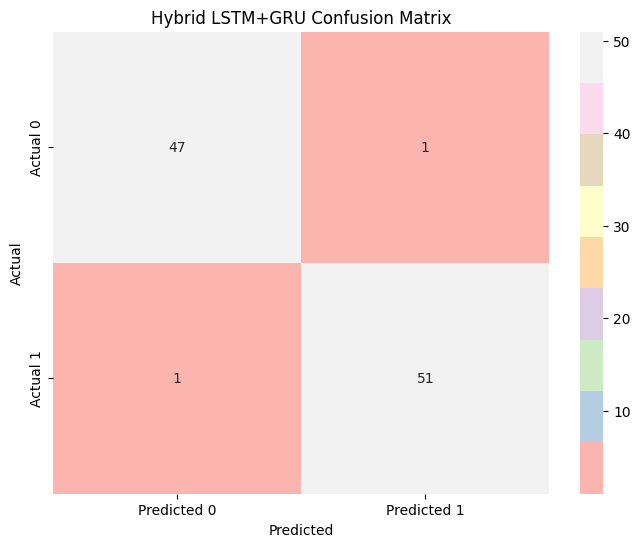

In [ ]:
# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Pastel1", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Hybrid LSTM+GRU Confusion Matrix')
plt.show()

Recall, precison , senstivity of Hybrid model

In [ ]:

# Using the values from the confusion matrix
TP = 49
TN = 47
FP = 1
FN = 3
accuracy = ((TP + TN) / (TP + TN + FP + FN))*100

# Calculate recall
recall = (TP / (TP + FN))*100

# Calculate precision
precision = (TP / (TP + FP))*100

#Calculate F1 Score
f1_score = (2 * (precision * recall) / (precision + recall))

# Sensitivity is the same as recall
sensitivity = recall

print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Accuarcy: {accuracy:.4f}")
print(f"F1 Score: {f1_score:.4f}")

Recall (Sensitivity): 94.2308
Precision: 98.0000
Accuarcy: 96.0000
F1 Score: 96.0784


RNN

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix

# Set the random seed for NumPy and PyTorch
np.random.seed(42)
torch.manual_seed(42)

# Define your data
X_train_num = np.random.rand(100, 9, 1)  # Example data: 100 samples, sequence length of 9, 1 feature
y_train = np.random.randint(0, 2, size=(100, 1))  # Binary labels

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_num, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

# Define the RNN model with dropout
class RNNModelWithDropout(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_prob=0.5):
        super(RNNModelWithDropout, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.dropout = nn.Dropout(dropout_prob)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.dropout(out)  # Applying dropout to RNN output
        out = self.fc(out[:, -1, :])
        return out

# Create the RNN model with dropout
input_size = 1  # Size of each input element (one feature)
hidden_size = 64  # Number of features in the hidden state
output_size = 1  # Output size (single value for binary classification)
dropout_prob = 0.5  # Dropout probability
model = RNNModelWithDropout(input_size, hidden_size, output_size, dropout_prob)

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()  # Binary cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Function to calculate accuracy
def calculate_accuracy(outputs, labels):
    preds = (outputs >= 0.5).to(torch.float32)
    correct = (preds == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy

# Train the model
num_epochs = 300
for epoch in range(num_epochs):
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    accuracy = calculate_accuracy(torch.sigmoid(outputs), y_train_tensor)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}, Accuracy: {accuracy * 100:.2f}%')

# Calculate and print the confusion matrix
y_pred = (torch.sigmoid(outputs) >= 0.5).squeeze().numpy()
y_true = y_train.squeeze()
confusion = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(confusion)


Epoch [1/300], Loss: 0.6896190047264099, Accuracy: 55.00%
Epoch [2/300], Loss: 0.685153067111969, Accuracy: 50.00%
Epoch [3/300], Loss: 0.6998573541641235, Accuracy: 51.00%
Epoch [4/300], Loss: 0.700960099697113, Accuracy: 51.00%
Epoch [5/300], Loss: 0.6931803226470947, Accuracy: 49.00%
Epoch [6/300], Loss: 0.6944421529769897, Accuracy: 50.00%
Epoch [7/300], Loss: 0.6986690759658813, Accuracy: 48.00%
Epoch [8/300], Loss: 0.6945649981498718, Accuracy: 54.00%
Epoch [9/300], Loss: 0.7031792998313904, Accuracy: 49.00%
Epoch [10/300], Loss: 0.6882381439208984, Accuracy: 58.00%
Epoch [11/300], Loss: 0.687640368938446, Accuracy: 51.00%
Epoch [12/300], Loss: 0.6928572058677673, Accuracy: 53.00%
Epoch [13/300], Loss: 0.6885465383529663, Accuracy: 55.00%
Epoch [14/300], Loss: 0.6927255392074585, Accuracy: 51.00%
Epoch [15/300], Loss: 0.702968418598175, Accuracy: 43.00%
Epoch [16/300], Loss: 0.6883746385574341, Accuracy: 53.00%
Epoch [17/300], Loss: 0.6928773522377014, Accuracy: 55.00%
Epoch [18/

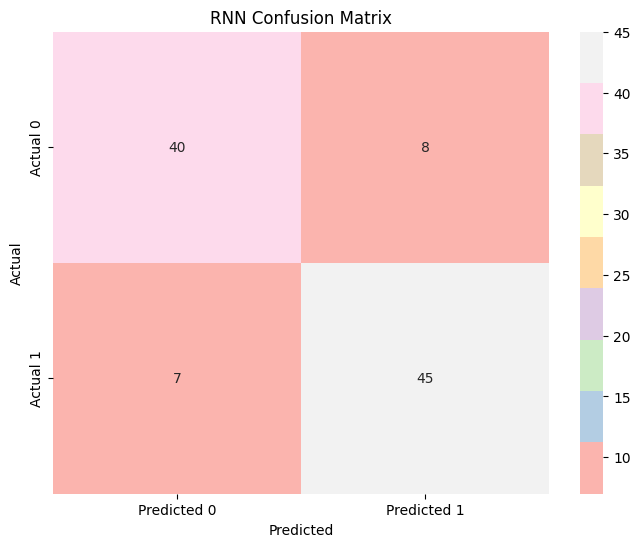

In [ ]:
# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Pastel1", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RNN Confusion Matrix')
plt.show()

In [ ]:
# Define the values from the confusion matrix
TP = 45
FP = 8
FN = 7
TN = 40

# Calculate recall
recall = (TP / (TP + FN))*100
accuracy = (TP+TN/(TP+TN+FP+FN))
# Calculate precision
precision = (TP / (TP + FP))*100

#Calculate F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Sensitivity is the same as recall
sensitivity = recall

print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"F1 Score: {f1_score:.4f}")
print(f"Accuracy: {accuracy:.4f}")


Recall (Sensitivity): 86.5385
Precision: 84.9057
Sensitivity: 86.5385
F1 Score: 85.7143
Accuracy: 45.4000


##Comparing error metrics of all the models in training set

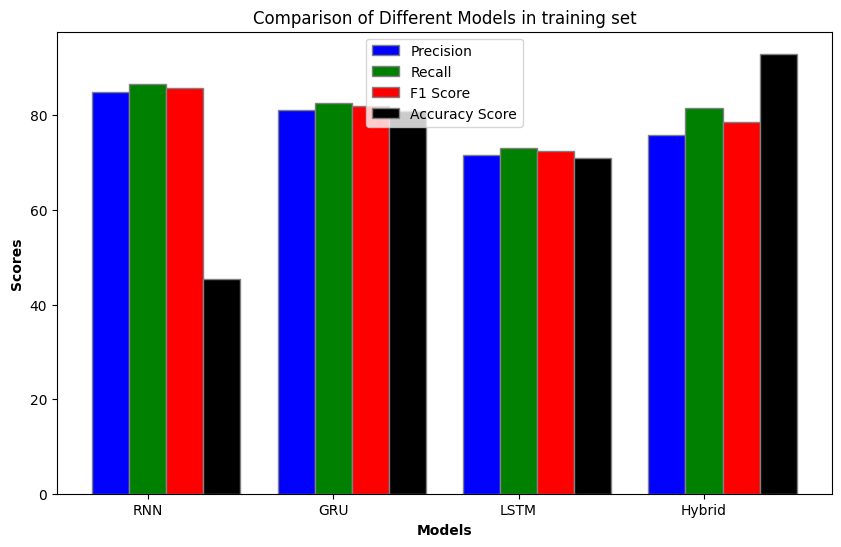

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example metrics for the models (replace with your actual calculated metrics)
model_names = ['RNN', 'GRU', 'LSTM', 'Hybrid']
recall_scores = [86.5385, 82.6923, 73.0769, 81.48]
precision_scores = [84.9057, 81.1321,71.6981,75.86]
f1_scores = [85.7143, 81.9048, 72.381,78.57]
accuracy_scores = [45.4, 81, 71, 93.02]


# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(model_names))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot the bars
plt.figure(figsize=(10, 6))
plt.bar(r1, precision_scores, color='blue', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, recall_scores, color='green', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, f1_scores, color='red', width=bar_width, edgecolor='grey', label='F1 Score')
plt.bar(r4, accuracy_scores, color='black', width=bar_width, edgecolor='grey', label='Accuracy Score')
# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(model_names))], model_names)

# Add labels
plt.ylabel('Scores', fontweight='bold')
plt.title('Comparison of Different Models in training set')
plt.legend()

# Show the plot
plt.show()


# Comparison of scores in Testing set

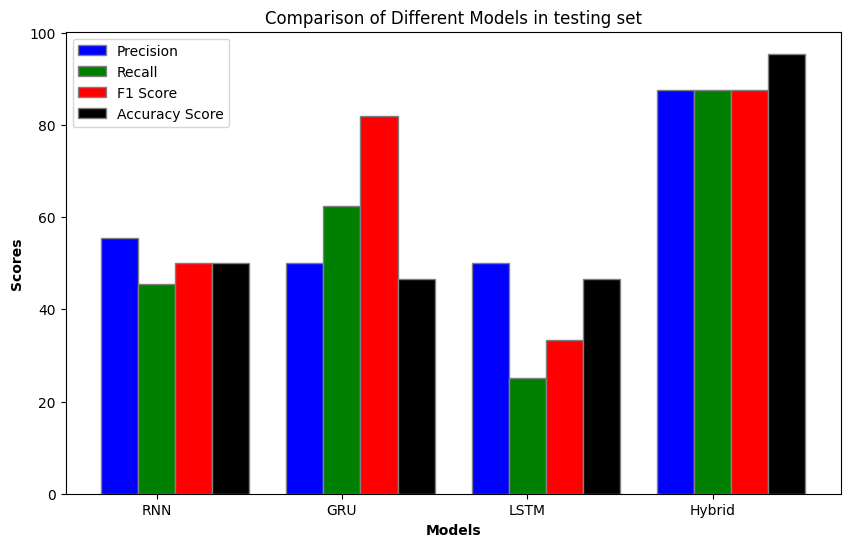

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example metrics for the models (replace with your actual calculated metrics)
model_names = ['RNN', 'GRU', 'LSTM', 'Hybrid']
recall_scores = [45.45, 62.50, 25, 87.50]
precision_scores = [55.56, 50.00,50.00,87.50]
f1_scores = [50, 81.9048, 33.33,87.50]
accuracy_scores = [50, 46.67, 46.67, 95.45]


# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(model_names))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot the bars
plt.figure(figsize=(10, 6))
plt.bar(r1, precision_scores, color='blue', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, recall_scores, color='green', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, f1_scores, color='red', width=bar_width, edgecolor='grey', label='F1 Score')
plt.bar(r4, accuracy_scores, color='black', width=bar_width, edgecolor='grey', label='Accuracy Score')
# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(model_names))], model_names)

# Add labels
plt.ylabel('Scores', fontweight='bold')
plt.title('Comparison of Different Models in testing set')
plt.legend()

# Show the plot
plt.show()


# Comparing both on a single chart

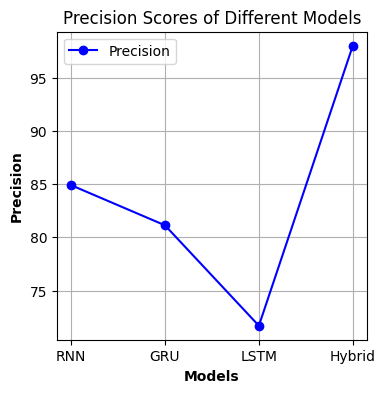

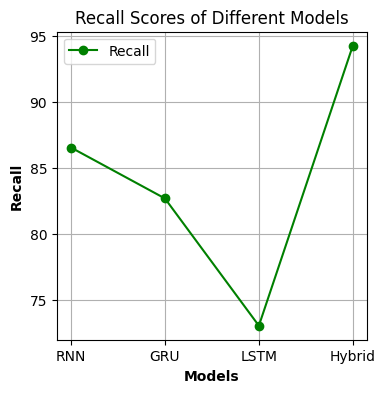

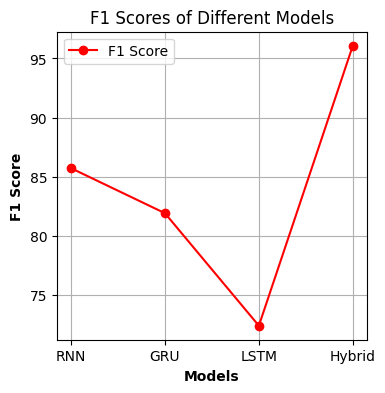

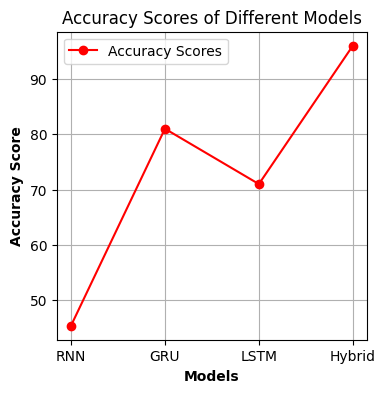

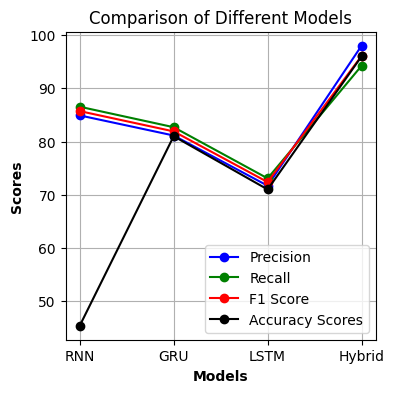

In [ ]:
import matplotlib.pyplot as plt

# Example metrics for the models (replace with your actual calculated metrics)
model_names = ['RNN','GRU','LSTM','Hybrid']
recall_scores = [86.5385, 82.6923, 73.0769, 94.2308]
precision_scores = [84.9057, 81.1321,71.6981, 98]
f1_scores = [85.7143, 81.9048, 72.381,96.0784]
accuracy_scores = [45.4, 81, 71, 96]

# Plot Precision
plt.figure(figsize=(4, 4))
plt.plot(model_names, precision_scores, marker='o', label='Precision', color='blue')
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Precision', fontweight='bold')
plt.title('Precision Scores of Different Models')
plt.grid(True)
plt.legend()
plt.show()

# Plot Recall
plt.figure(figsize=(4, 4))
plt.plot(model_names, recall_scores, marker='o', label='Recall', color='green')
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Recall', fontweight='bold')
plt.title('Recall Scores of Different Models')
plt.grid(True)
plt.legend()
plt.show()

# Plot F1 Score
plt.figure(figsize=(4, 4))
plt.plot(model_names, f1_scores, marker='o', label='F1 Score', color='red')
plt.xlabel('Models', fontweight='bold')
plt.ylabel('F1 Score', fontweight='bold')
plt.title('F1 Scores of Different Models')
plt.grid(True)
plt.legend()
plt.show()

#Plot Accuracy scores
plt.figure(figsize=(4, 4))
plt.plot(model_names, accuracy_scores, marker='o', label='Accuracy Scores', color='red')
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Accuracy Score', fontweight='bold')
plt.title('Accuracy Scores of Different Models')
plt.grid(True)
plt.legend()
plt.show()

# Plot all metrics in one graph
plt.figure(figsize=(4, 4))
plt.plot(model_names, precision_scores, marker='o', label='Precision', color='blue')
plt.plot(model_names, recall_scores, marker='o', label='Recall', color='green')
plt.plot(model_names, f1_scores, marker='o', label='F1 Score', color='red')
plt.plot(model_names, accuracy_scores, marker='o', label='Accuracy Scores', color='black')
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.title('Comparison of Different Models')
plt.grid(True)
plt.legend()
plt.show()


Correlation matrix

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the random seed for NumPy
np.random.seed(42)

# Define your data100,7
X_train_num = np.random.rand(100, 7, 1)
y_train = np.random.randint(0, 2, size=(100, 1))

# Reshape X_train_num to a 2D array
X_train_reshaped = X_train_num.reshape(100, -1)

# Define the feature names according to water quality parameters
feature_names = [
    'Avg Temp', 'AvgDissolved O2(mg/L)', 'Avg pH', 'Avg Conductivity (μmho/cm)',
    'Avg BOD', 'Avg NitrateN + NitriteN (mg/L)', 'Avg Fecal Coliform (MPN/100ML)'
]

# Convert to a DataFrame
df = pd.DataFrame(X_train_reshaped, columns=feature_names)

# Compute the correlation matrix
correlation_matrix = df.corr()



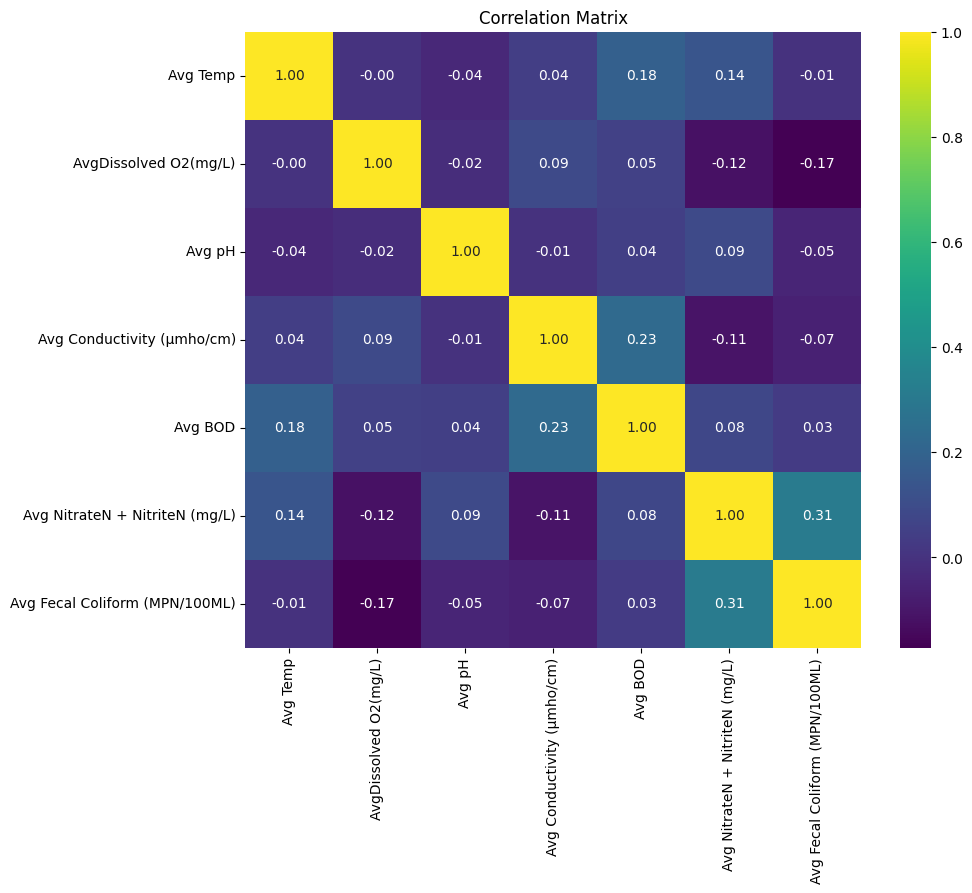

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='viridis', square=True)
plt.title('Correlation Matrix')
plt.show()

# RNN Validation vs Training accurcay

Epoch [10/300], Loss: 0.6899105310440063, Training Accuracy: 57.00%, Validation Accuracy: 45.00%
Epoch [20/300], Loss: 0.6911839842796326, Training Accuracy: 53.00%, Validation Accuracy: 40.00%
Epoch [30/300], Loss: 0.6810387969017029, Training Accuracy: 59.00%, Validation Accuracy: 25.00%
Epoch [40/300], Loss: 0.6776877045631409, Training Accuracy: 59.00%, Validation Accuracy: 45.00%
Epoch [50/300], Loss: 0.6704798936843872, Training Accuracy: 62.00%, Validation Accuracy: 55.00%
Epoch [60/300], Loss: 0.6566887497901917, Training Accuracy: 63.00%, Validation Accuracy: 50.00%
Epoch [70/300], Loss: 0.6619611382484436, Training Accuracy: 57.00%, Validation Accuracy: 50.00%
Epoch [80/300], Loss: 0.6520958542823792, Training Accuracy: 63.00%, Validation Accuracy: 55.00%
Epoch [90/300], Loss: 0.6458656191825867, Training Accuracy: 65.00%, Validation Accuracy: 60.00%
Epoch [100/300], Loss: 0.6540880799293518, Training Accuracy: 60.00%, Validation Accuracy: 55.00%
Epoch [110/300], Loss: 0.6551

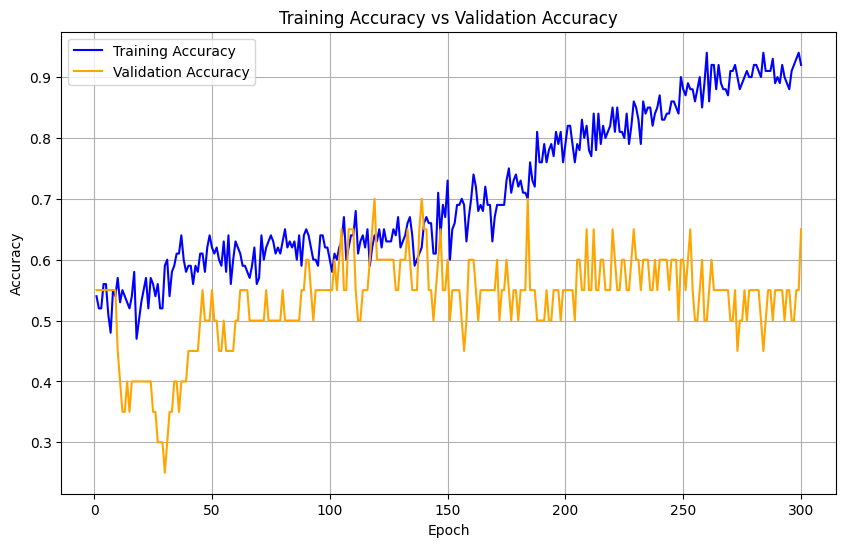

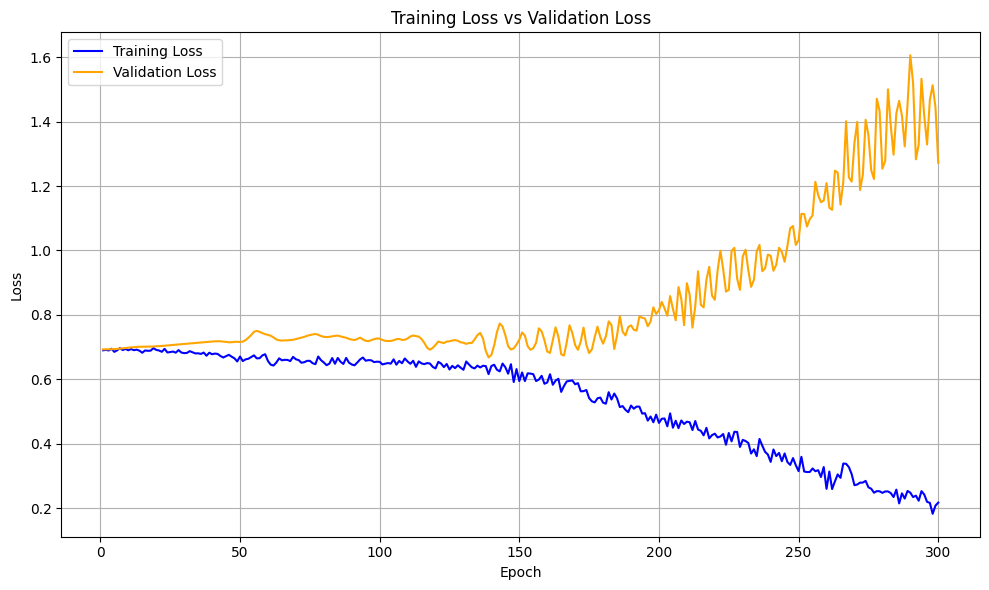

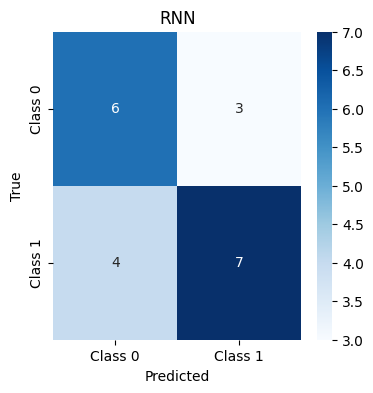

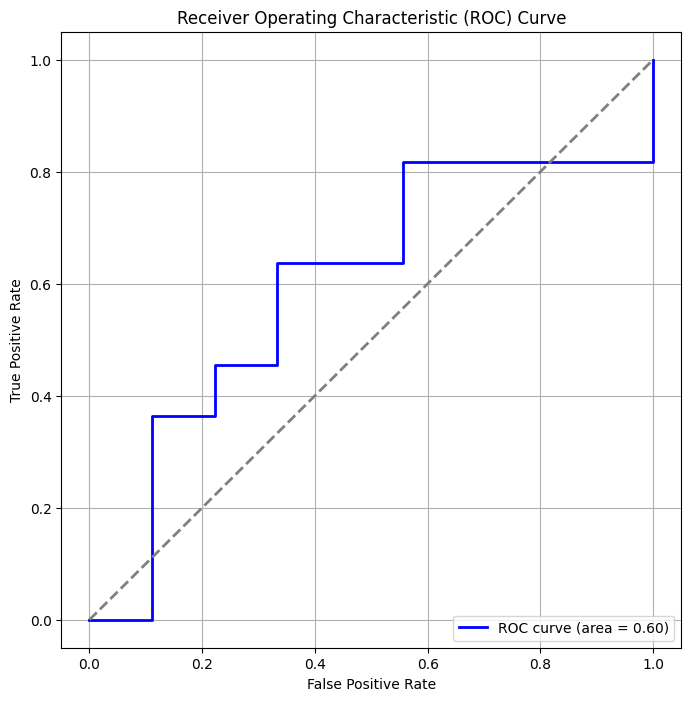

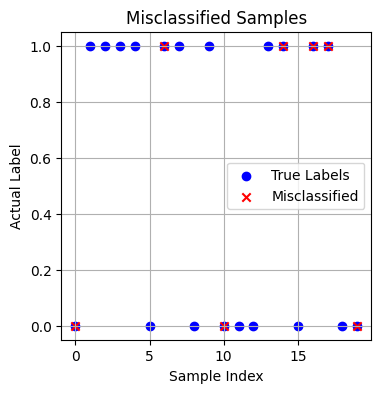

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Set the random seed for NumPy and PyTorch
np.random.seed(42)
torch.manual_seed(42)

# Define your data
X_train_num = np.random.rand(100, 9, 1)  # Example data: 100 samples, sequence length of 9, 1 feature
y_train = np.random.randint(0, 2, size=(100, 1))  # Binary labels

X_val_num = np.random.rand(20, 9, 1)  # Validation data: 20 samples
y_val = np.random.randint(0, 2, size=(20, 1))  # Validation binary labels

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_num, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

X_val_tensor = torch.tensor(X_val_num, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

# Define the RNN model with dropout
class RNNModelWithDropout(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_prob=0.5):
        super(RNNModelWithDropout, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.dropout = nn.Dropout(dropout_prob)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.dropout(out)  # Applying dropout to RNN output
        out = self.fc(out[:, -1, :])
        return out

# Create the RNN model with dropout
input_size = 1  # Size of each input element (one feature)
hidden_size = 128  # Number of features in the hidden state
output_size = 1  # Output size (single value for binary classification)
dropout_prob = 0.5  # Dropout probability
model = RNNModelWithDropout(input_size, hidden_size, output_size, dropout_prob)

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()  # Binary cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Function to calculate accuracy
def calculate_accuracy(outputs, labels):
    preds = (outputs >= 0.5).to(torch.float32)
    correct = (preds == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy

# Lists to store accuracies and losses
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []

# Train the model
num_epochs = 300
for epoch in range(num_epochs):
    # Training phase
    model.train()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Calculate training accuracy and loss
    train_accuracy = calculate_accuracy(torch.sigmoid(outputs), y_train_tensor)
    train_losses.append(loss.item())
    train_accuracies.append(train_accuracy)

    # Validation phase
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        val_accuracy = calculate_accuracy(torch.sigmoid(val_outputs), y_val_tensor)
        val_losses.append(val_loss.item())
        val_accuracies.append(val_accuracy)

    # Print progress
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}, Training Accuracy: {train_accuracy * 100:.2f}%, Validation Accuracy: {val_accuracy * 100:.2f}%')

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy',color = 'blue')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy',color = 'orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.legend()
plt.grid(True)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss',color = 'blue')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', color = 'orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate and print the confusion matrix for the validation set
y_pred_val = (torch.sigmoid(val_outputs) >= 0.5).squeeze().numpy()
y_true_val = y_val.squeeze()
confusion = confusion_matrix(y_true_val, y_pred_val)

# Plot confusion matrix for testing data
plt.figure(figsize=(4,4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('RNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# ROC and AUC plotting
fpr, tpr, _ = roc_curve(y_true_val, torch.sigmoid(val_outputs).squeeze().numpy())
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Misclassifications plot
predictions = torch.sigmoid(val_outputs).squeeze().numpy()
misclassified_indices = np.where((y_true_val != (predictions >= 0.5).astype(int)))[0]

plt.figure(figsize=(4, 4))
plt.scatter(range(len(y_true_val)), y_true_val, color='blue', label='True Labels')
plt.scatter(misclassified_indices, y_true_val[misclassified_indices], color='red', label='Misclassified', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Actual Label')
plt.title('Misclassified Samples')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Confusion matrix values
tn, fp, fn, tp = 6, 3, 4, 7

# Calculate metrics
accuracy = ((tp + tn) / (tp + tn + fp + fn)) * 100
precision = (tp / (tp + fp)) * 100
recall = (tp / (tp + fn)) * 100
f1_score = 2 * (precision * recall) / (precision + recall)

# Print metrics
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1_score:.2f}%")


Accuracy: 65.00%
Precision: 70.00%
Recall: 63.64%
F1 Score: 66.67%


In [ ]:
# Evaluate model on training data
model.eval()
with torch.no_grad():
    train_outputs = model(X_train_tensor)
    y_train_pred = (torch.sigmoid(train_outputs) >= 0.5).squeeze().numpy()  # Predicted labels

# Convert true labels to NumPy
y_train_true = y_train.squeeze()

# Calculate training metrics
train_accuracy = (y_train_pred == y_train_true).mean() * 100
train_precision = precision_score(y_train_true, y_train_pred) * 100
train_recall = recall_score(y_train_true, y_train_pred) * 100
train_f1 = f1_score(y_train_true, y_train_pred) * 100

# Print the metrics
print("\nTraining Metrics:")
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Training Precision: {train_precision:.2f}%")
print(f"Training Recall: {train_recall:.2f}%")
print(f"Training F1 Score: {train_f1:.2f}%")



Training Metrics:
Training Accuracy: 92.00%
Training Precision: 90.74%
Training Recall: 94.23%
Training F1 Score: 92.45%


#GRU Validation vs Trainning model

Epoch [10/300], Loss: 0.6920678019523621, Train Accuracy: 51.76%, Val Accuracy: 53.33%
Epoch [20/300], Loss: 0.6905072927474976, Train Accuracy: 54.12%, Val Accuracy: 53.33%
Epoch [30/300], Loss: 0.6838180422782898, Train Accuracy: 51.76%, Val Accuracy: 53.33%
Epoch [40/300], Loss: 0.6821033954620361, Train Accuracy: 52.94%, Val Accuracy: 46.67%
Epoch [50/300], Loss: 0.6817569732666016, Train Accuracy: 51.76%, Val Accuracy: 53.33%
Epoch [60/300], Loss: 0.6811916828155518, Train Accuracy: 52.94%, Val Accuracy: 60.00%
Epoch [70/300], Loss: 0.6805934906005859, Train Accuracy: 51.76%, Val Accuracy: 60.00%
Epoch [80/300], Loss: 0.6795787811279297, Train Accuracy: 52.94%, Val Accuracy: 53.33%
Epoch [90/300], Loss: 0.677455723285675, Train Accuracy: 52.94%, Val Accuracy: 46.67%
Epoch [100/300], Loss: 0.6741321086883545, Train Accuracy: 55.29%, Val Accuracy: 53.33%
Epoch [110/300], Loss: 0.6676199436187744, Train Accuracy: 57.65%, Val Accuracy: 53.33%
Epoch [120/300], Loss: 0.6596418619155884,

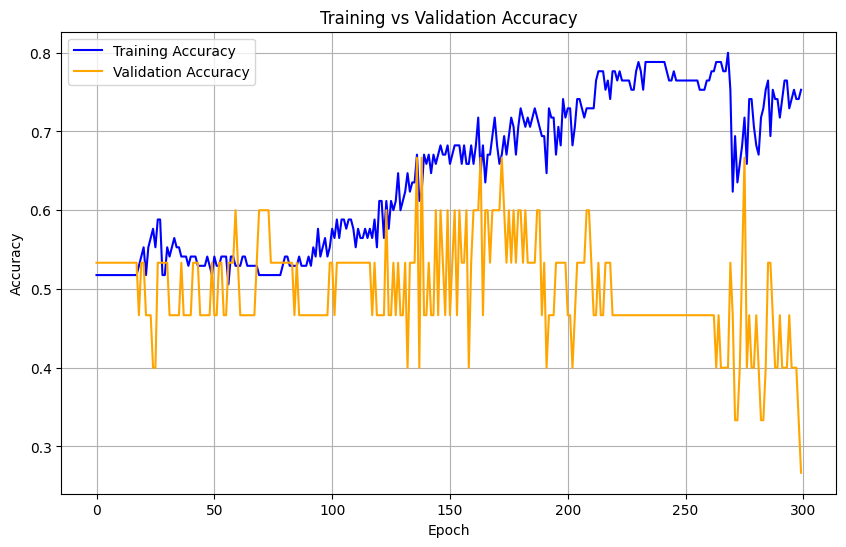

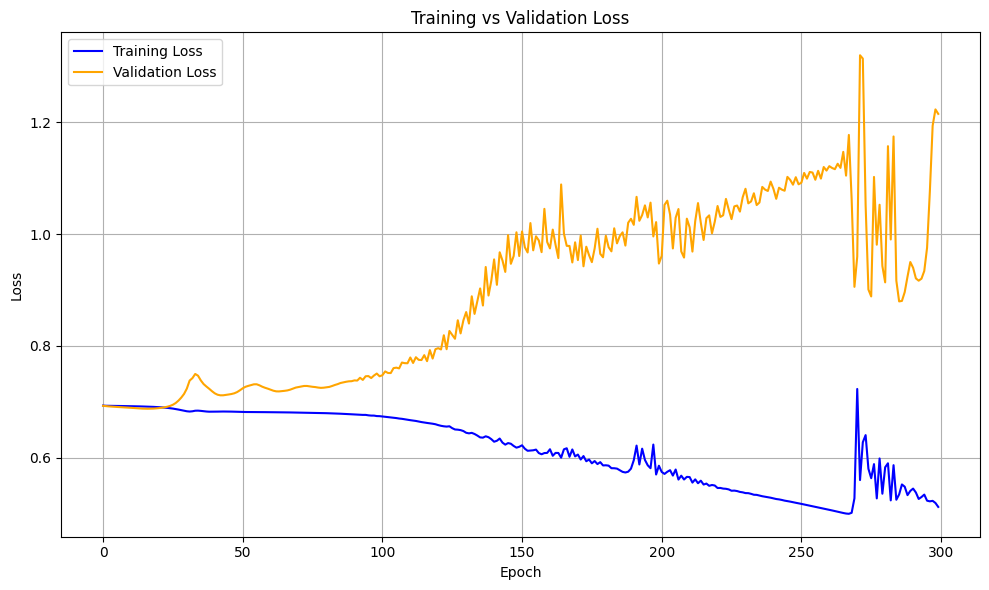

GRU
[[0 7]
 [4 4]]


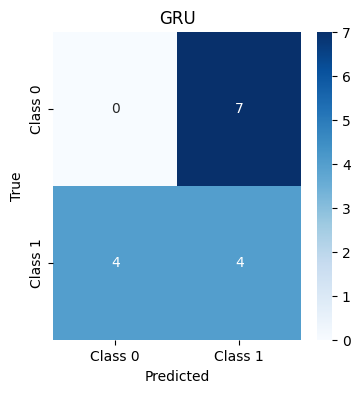


Training Metrics:
Training Accuracy: 75.29%
Training Precision: 79.49%
Training Recall: 70.45%
Training F1 Score: 74.70%


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Set the random seed for NumPy and PyTorch
np.random.seed(42)
torch.manual_seed(42)

# Define your data
X = np.random.rand(100, 9, 1)  # 100 samples, 9 timesteps, 1 feature
y = np.random.randint(0, 2, size=(100, 1))  # Binary labels

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=42)

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

# Define the GRU model
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.gru(x)
        out = self.fc(out[:, -1, :])
        return out

# Create the GRU model
input_size = 1
hidden_size = 128
output_size = 1
model = GRUModel(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Function to calculate accuracy
def calculate_accuracy(outputs, labels):
    preds = (outputs >= 0.5).to(torch.float32)
    correct = (preds == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy

# Lists to store accuracy and loss values
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []

# Train the model
num_epochs = 300
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_accuracy = calculate_accuracy(torch.sigmoid(outputs), y_train_tensor)
    train_accuracies.append(train_accuracy)
    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        val_accuracy = calculate_accuracy(torch.sigmoid(val_outputs), y_val_tensor)
        val_accuracies.append(val_accuracy)
        val_losses.append(val_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}, Train Accuracy: {train_accuracy * 100:.2f}%, Val Accuracy: {val_accuracy * 100:.2f}%')

# Plot training vs. validation accuracy
plt.figure(figsize=(10, 6))

plt.plot(train_accuracies, label='Training Accuracy',color='blue')
plt.plot(val_accuracies, label='Validation Accuracy',color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)

# Plot training vs. validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss',color='blue')
plt.plot(val_losses, label='Validation Loss',color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate and print the confusion matrix
y_pred_val = (torch.sigmoid(val_outputs) >= 0.5).squeeze().numpy()
y_true_val = y_val.squeeze()
confusion = confusion_matrix(y_true_val, y_pred_val)

# Print confusion matrix
print("GRU")
print(confusion)

# Plot confusion matrix for validation set
plt.figure(figsize=(4,4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('GRU')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculate and print training metrics (accuracy, precision, recall, F1 score)
train_preds = (torch.sigmoid(outputs) >= 0.5).squeeze().numpy()  # Predicted labels for training
train_true = y_train.squeeze()  # True labels for training

train_accuracy = (train_preds == train_true).mean() * 100
train_precision = precision_score(train_true, train_preds) * 100
train_recall = recall_score(train_true, train_preds) * 100
train_f1 = f1_score(train_true, train_preds) * 100

# Print training metrics
print("\nTraining Metrics:")
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Training Precision: {train_precision:.2f}%")
print(f"Training Recall: {train_recall:.2f}%")
print(f"Training F1 Score: {train_f1:.2f}%")


In [ ]:
# Confusion matrix values
tn, fp, fn, tp = 0, 7, 4, 4

# Calculate metrics
accuracy = ((tp + tn) / (tp + tn + fp + fn)) * 100
precision = (tp / (tp + fp)) * 100
recall = (tp / (tp + fn)) * 100
f1_score = 2 * (precision * recall) / (precision + recall)

# Print metrics
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1_score:.2f}%")

Accuracy: 26.67%
Precision: 36.36%
Recall: 50.00%
F1 Score: 42.11%


In [ ]:
# Evaluate model on training data
model.eval()
with torch.no_grad():
    train_outputs = model(X_train_tensor)
    y_train_pred = (torch.sigmoid(train_outputs) >= 0.5).squeeze().numpy()  # Predicted labels

# Convert true labels to NumPy
y_train_true = y_train.squeeze()

# Calculate training metrics
train_accuracy = (y_train_pred == y_train_true).mean() * 100
train_precision = precision_score(y_train_true, y_train_pred) * 100
train_recall = recall_score(y_train_true, y_train_pred) * 100
train_f1 = f1_score(y_train_true, y_train_pred) * 100

# Print the metrics
print("\nTraining Metrics:")
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Training Precision: {train_precision:.2f}%")
print(f"Training Recall: {train_recall:.2f}%")
print(f"Training F1 Score: {train_f1:.2f}%")



Training Metrics:
Training Accuracy: 92.00%
Training Precision: 90.74%
Training Recall: 94.23%
Training F1 Score: 92.45%


# LSTM Validation vs Trainning

Epoch [10/300], Loss: 0.6925585865974426, Train Accuracy: 51.76%, Val Accuracy: 53.33%
Epoch [20/300], Loss: 0.6919399499893188, Train Accuracy: 51.76%, Val Accuracy: 53.33%
Epoch [30/300], Loss: 0.6897655725479126, Train Accuracy: 52.94%, Val Accuracy: 53.33%
Epoch [40/300], Loss: 0.6846730709075928, Train Accuracy: 57.65%, Val Accuracy: 46.67%
Epoch [50/300], Loss: 0.6831755042076111, Train Accuracy: 54.12%, Val Accuracy: 46.67%
Epoch [60/300], Loss: 0.682020366191864, Train Accuracy: 51.76%, Val Accuracy: 40.00%
Epoch [70/300], Loss: 0.6810206174850464, Train Accuracy: 50.59%, Val Accuracy: 33.33%
Epoch [80/300], Loss: 0.6805488467216492, Train Accuracy: 51.76%, Val Accuracy: 46.67%
Epoch [90/300], Loss: 0.6793279051780701, Train Accuracy: 51.76%, Val Accuracy: 40.00%
Epoch [100/300], Loss: 0.677172064781189, Train Accuracy: 52.94%, Val Accuracy: 46.67%
Epoch [110/300], Loss: 0.6727645397186279, Train Accuracy: 52.94%, Val Accuracy: 40.00%
Epoch [120/300], Loss: 0.6677206158638, Tra

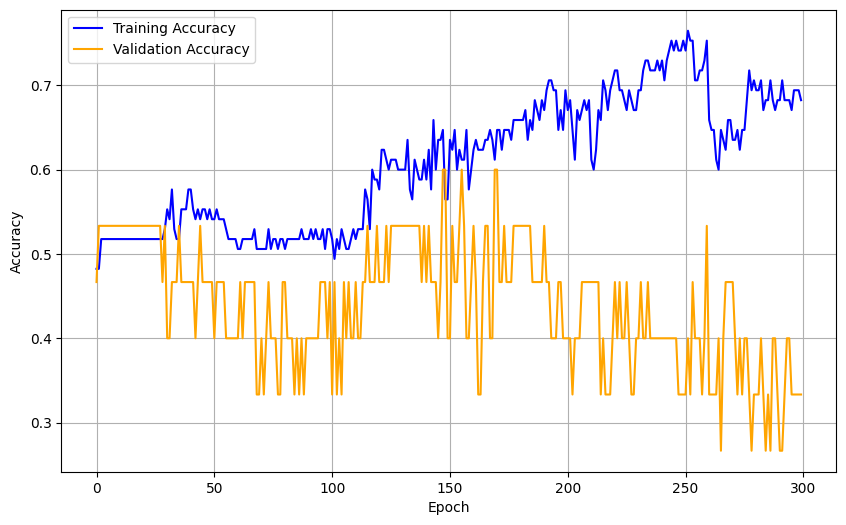

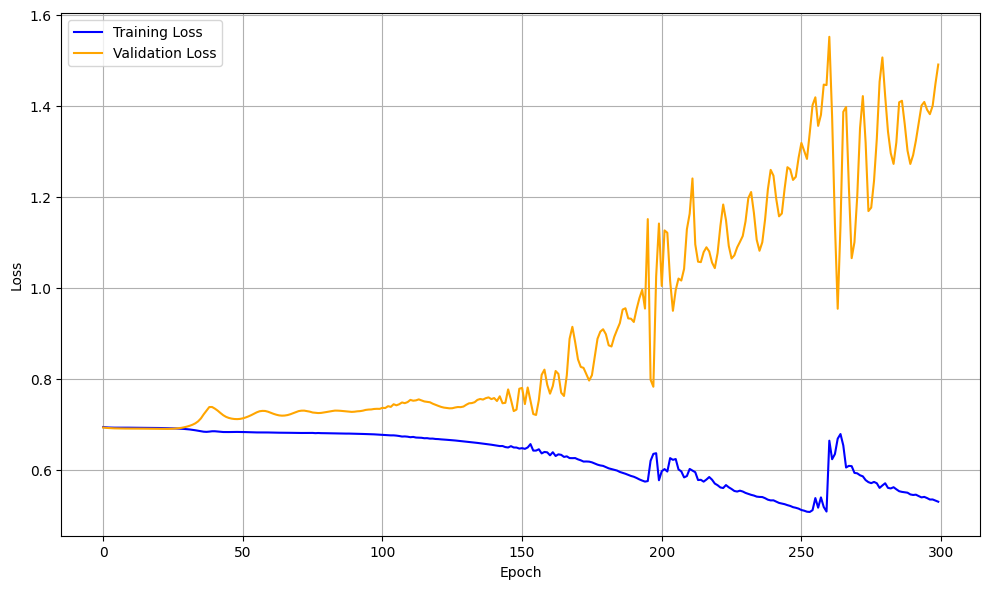

Confusion Matrix (Validation Set):
[[2 5]
 [5 3]]


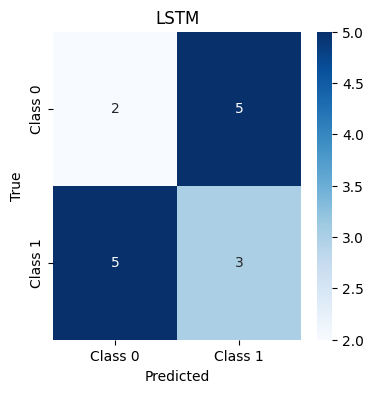


Training Metrics:
Training Accuracy: 68.24%
Training Precision: 63.93%
Training Recall: 88.64%
Training F1 Score: 74.29%


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Set the random seed for NumPy and PyTorch
np.random.seed(42)
torch.manual_seed(42)

# Define your data
X = np.random.rand(100, 9, 1)  # 100 samples, 9 timesteps, 1 feature
y = np.random.randint(0, 2, size=(100, 1))  # Binary labels

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=42)

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

# Create the LSTM model
input_size = 1
hidden_size = 128
output_size = 1
model = LSTMModel(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()  # Binary cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Function to calculate accuracy
def calculate_accuracy(outputs, labels):
    preds = (outputs >= 0.5).to(torch.float32)
    correct = (preds == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy

# Lists to store accuracy and loss values
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []

# Train the model
num_epochs = 300
for epoch in range(num_epochs):
    model.train()
    # Training step
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Record training accuracy and loss
    train_accuracy = calculate_accuracy(torch.sigmoid(outputs), y_train_tensor)
    train_accuracies.append(train_accuracy)
    train_losses.append(loss.item())

    # Validation step
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        val_accuracy = calculate_accuracy(torch.sigmoid(val_outputs), y_val_tensor)
        val_accuracies.append(val_accuracy)
        val_losses.append(val_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}, Train Accuracy: {train_accuracy * 100:.2f}%, Val Accuracy: {val_accuracy * 100:.2f}%')

# Plot training vs. validation accuracy and loss
plt.figure(figsize=(10, 6))

# Accuracy plot

plt.plot(train_accuracies, label='Training Accuracy',color = 'blue')
plt.plot(val_accuracies, label='Validation Accuracy',color = 'orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss',color = 'blue')
plt.plot(val_losses, label='Validation Loss',color = 'orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate and print the confusion matrix for validation data
y_pred_val = (torch.sigmoid(val_outputs) >= 0.5).squeeze().numpy()
y_true_val = y_val.squeeze()
confusion = confusion_matrix(y_true_val, y_pred_val)

print("Confusion Matrix (Validation Set):")
print(confusion)

# Plot confusion matrix for validation data
plt.figure(figsize=(4, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('LSTM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculate and print training metrics (accuracy, precision, recall, F1 score)
train_preds = (torch.sigmoid(outputs) >= 0.5).squeeze().numpy()  # Predicted labels for training
train_true = y_train.squeeze()  # True labels for training

train_accuracy = (train_preds == train_true).mean() * 100
train_precision = precision_score(train_true, train_preds) * 100
train_recall = recall_score(train_true, train_preds) * 100
train_f1 = f1_score(train_true, train_preds) * 100

# Print training metrics
print("\nTraining Metrics:")
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Training Precision: {train_precision:.2f}%")
print(f"Training Recall: {train_recall:.2f}%")
print(f"Training F1 Score: {train_f1:.2f}%")


In [ ]:
# Confusion matrix values
tn, fp, fn, tp = 2, 5, 5, 3

# Calculate metrics
accuracy = ((tp + tn) / (tp + tn + fp + fn)) * 100
precision = (tp / (tp + fp)) * 100
recall = (tp / (tp + fn)) * 100
f1_score = 2 * (precision * recall) / (precision + recall)

# Print metrics
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1_score:.2f}%")

Accuracy: 33.33%
Precision: 37.50%
Recall: 37.50%
F1 Score: 37.50%
